In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sb
import os
import json
import statsmodels.api as sm
import tweepy

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1. Gather

In [2]:
# Reading the tweets archive from csv file loaded to Jupyter
tw_archive_enhance = pd.read_csv('twitter-archive-enhanced.csv')
tw_archive_enhance.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Creating a folder for storing the image predictions file
folder_name = 'twitter_archive'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
#Importing Image Predictions file from Udacity url
with open(os.path.join (folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:

image_predictions = pd.read_csv('twitter_archive/image-predictions.tsv', sep = '\t')

In [6]:
#Getting Access to the twitter library and twitter API
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
image_predictions.info()

ids = image_predictions.tweet_id
ids.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: int64

In [8]:
folder = 'tweet_text'
if not os.path.exists(folder):
    os.makedirs(folder)
f = open("tweet_text/tweet_json.txt","w+")

In [ ]:
# Tried to write from twitter but this did not work so using the txt file in the 
tweet_errors = {}
for t in ids:
    try:
       tweet = api.get_status(t, tweet_mode = 'extended', wait_on_rate_limit= True,wait_on_rate_limit_notify = True)
       json.dump(tweet, f)
       print(tweet.full_text)
    except Exception as e:
       tweet_errors.append(tw_archive_enhance.tweet_id)

In [11]:
# Reading the tweet-json file line by line using a loop and then storing in an array
dweets = []
with open ('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data['id_str']
        retweet_counts = data['retweet_count']
        fav_count = data['favorite_count']
        full_text = data['full_text']
        #Storing in a dictionary
        tweet_dic = {'tweet_id': tweet_id,
                     'retweet_count':retweet_counts,
                     'fav_count':fav_count,
                     'full_text':full_text
                    }
        dweets.append(tweet_dic)
dweets[0]

{'tweet_id': '892420643555336193',
 'retweet_count': 8853,
 'fav_count': 39467,
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"}

In [12]:
#Storing the ids in a pandas data frame
tweets_df = pd.DataFrame(dweets, columns =['tweet_id', 'retweet_count','fav_count','full_text'])
tweets_df.dtypes

tweet_id         object
retweet_count     int64
fav_count         int64
full_text        object
dtype: object

## 2. Assessing Data

In [13]:
#Assessing Data Types to check for quality issues
tw_archive_enhance.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [13]:
tw_archive_enhance.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
image_predictions.info()
image_predictions.jpg_url.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


66

In [15]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id         2354 non-null object
retweet_count    2354 non-null int64
fav_count        2354 non-null int64
full_text        2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


In [15]:
#Checking source column to understand the source of the tweets
tw_archive_enhance.source[1000]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [16]:
tw_archive_enhance.info()
tw_archive_enhance.name.value_counts()
tw_archive_enhance.timestamp.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

0

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality Issues
1. Tweet_id in the df dataframe is an object and should be int
2. Count is different in the three data frames
3. Archive spreadsheet the timestamp is not in datetime format
4. Remove all records with retweet statuses set to tweet_id as they are retweets
5. Remove columns with low count in archive file
6. Many issues in denominator, especially fixing value with 2,7,20 which are all invalid in the predictions file
7. 66 duplicated urls in the image predictions csv -- to be performed first
8. 137 duplicated extended urls in the twitter archive file -- to be performed first
9. Separate the source column in archive file to represent the actual source form the entire url string

### Tidiness Issues

1. Image Predictions file can be combined with the to include the retweet_counts and favorite_counts to have all the data for analysis in one file
2. Combine ratings into one ratings column instead of numerator and denominator

## 3. Clean 

Make Copies of the data to retain original dataset in case of issues

In [15]:
#Make copies of all 3 spreadsheets

img_pred = image_predictions.copy()
tw_arch =  tw_archive_enhance.copy()
twdf_clean = tweets_df.copy()

#### Define
Update tw_arch to include only dedupliated url values by using the deduplicated function and the not symbol

#### Code

In [16]:
#Remove duplicate urls as the images of dogs are duplicated
tw_arch = tw_arch[~(tw_arch.expanded_urls.duplicated())]

#### Test

In [17]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2219 non-null int64
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2219 non-null object
source                        2219 non-null object
text                          2219 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2218 non-null object
rating_numerator              2219 non-null int64
rating_denominator            2219 non-null int64
name                          2219 non-null object
doggo                         2219 non-null object
floofer                       2219 non-null object
pupper                        2219 non-null object
puppo                         2219 non-null object
dtypes: float64(4), int64(3), ob

#### Define

Remove the in reply to status ids using drop function


#### Code

In [19]:
#Remove in reply to status_id and in reply to user id as information counts are low
# Clean
tw_arch = tw_arch.drop('in_reply_to_status_id', axis = 1)
tw_arch = tw_arch.drop('in_reply_to_user_id', axis = 1)

#### Test

In [20]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2219 non-null int64
timestamp                     2219 non-null object
source                        2219 non-null object
text                          2219 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2218 non-null object
rating_numerator              2219 non-null int64
rating_denominator            2219 non-null int64
name                          2219 non-null object
doggo                         2219 non-null object
floofer                       2219 non-null object
pupper                        2219 non-null object
puppo                         2219 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 277.4+ KB


#### Define

1. Remove retweeted values by using the isnull function and ensuring only retweeted status null values are in the final data
2. Drop the 3 retweeted status rows as they are no essential to any analysis

#### Code

In [21]:
#Removing retweets where any retweeted id is not null and drop these columns as 
#they are null

#Clean
tw_arch = tw_arch[tw_arch.retweeted_status_id.isnull()]
tw_arch.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace= True, axis =1)

#### Test

In [22]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2039 non-null int64
timestamp             2039 non-null object
source                2039 non-null object
text                  2039 non-null object
expanded_urls         2038 non-null object
rating_numerator      2039 non-null int64
rating_denominator    2039 non-null int64
name                  2039 non-null object
doggo                 2039 non-null object
floofer               2039 non-null object
pupper                2039 non-null object
puppo                 2039 non-null object
dtypes: int64(3), object(9)
memory usage: 207.1+ KB


#### Define
Change timestamp using to_datettime function to a datetime datatype

#### Code

In [23]:
# Timestamp should be in date time format using to_datetime function

tw_arch.timestamp = pd.to_datetime(tw_arch.timestamp)


tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

#### Test

In [24]:
tw_arch.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

#### Define

Change tweet_id from object to int using astype function

#### Code

In [25]:
# Change tweet_id in twdf_clean to int from object type using astype
twdf_clean.tweet_id = twdf_clean.tweet_id.astype(int)

#### Test

In [26]:
twdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id         2354 non-null int64
retweet_count    2354 non-null int64
fav_count        2354 non-null int64
full_text        2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


#### Define

1. Use string rstrip function to remove the end <\a>
2. Use string extract and  regex to remove the source towards the end of the file and store it in a separate file for the 3 worded source.
3. Use string extract and  regex to remove the source towards the end of the file and store it in a separate file for the 2 worded source for verification.
4. Remove the original source column after storing all source values in one column.

#### Code

In [29]:
#Source id to narrow down the source 

#Using string extract and Regex to separate from the source column by first stripping the end </a>
#Step 2 is to use regular expressions to find the Source mentioned at the end of the String for 3 worded source

tw_arch['source']= tw_arch.source.str.rstrip('</a>')
tw_arch['source_final'] = tw_arch.source.str.extract('\>([A-Z-a-z]+\s[a-zA-Z]+\s[a-zA-Z]+)',expand = True)
tw_arch['source_final2'] = tw_arch.source.str.extract('\>(TweetDeck)', expand = True)
tw_arch.source_final.value_counts()

Twitter for iPhone    1909
Twitter Web Client      30
Name: source_final, dtype: int64

#### Code 2

In [30]:
# Repeating the process for the 2 worded strings
#tw_arch['source_final2'] = tw_arch.source.str.extract('\>(TweetDeck)', expand = True)

#Assimilating the information in a single column source_final by checking if all NaN values in source final can be replaced by TweetDeck source
tw_arch[tw_arch['source_final2']=='TweetDeck']

tw_arch['source_final'].fillna('TweetDeck', inplace = True)

#Drop Source_final2 and source tables as they are not Required
tw_arch.drop('source_final2',axis = 1, inplace = True)
tw_arch.drop('source',axis = 1, inplace = True)

#### Test

In [31]:
tw_arch.source_final.value_counts()

Twitter for iPhone    1909
TweetDeck              100
Twitter Web Client      30
Name: source_final, dtype: int64

#### Define
Remove ids from image predictions file which do not exist in archive file to maintain uniformity

#### Code

In [34]:

img_pred = img_pred[img_pred['tweet_id'].isin(tw_arch.tweet_id)]

#### Test

In [35]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1916 non-null int64
jpg_url     1916 non-null object
img_num     1916 non-null int64
p1          1916 non-null object
p1_conf     1916 non-null float64
p1_dog      1916 non-null bool
p2          1916 non-null object
p2_conf     1916 non-null float64
p2_dog      1916 non-null bool
p3          1916 non-null object
p3_conf     1916 non-null float64
p3_dog      1916 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 155.3+ KB


#### Define
Remove ids from archive file which do not exist in image predictions file to maintain uniformity

#### Code

In [26]:
#Matching counts with Tw archive as only 1916 have image predictions
#Clean
tw_arch = tw_arch[tw_arch['tweet_id'].isin(img_pred.tweet_id)]

#Test
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1916 non-null int64
timestamp             1916 non-null datetime64[ns]
source                1916 non-null object
text                  1916 non-null object
expanded_urls         1916 non-null object
rating_numerator      1916 non-null int64
rating_denominator    1916 non-null int64
name                  1916 non-null object
doggo                 1916 non-null object
floofer               1916 non-null object
pupper                1916 non-null object
puppo                 1916 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 194.6+ KB


#### Define
1. find median of the ratings values and store in a couple variables for numerator and denominator
2. Change the values using at function individually for numerator and denominator

#### Code

In [36]:
# Fixing numerator and ratingdenominators 
#2 where 1/2 is used to describe the legs, 7 where 24/7 was mentioned for all day
#4/20 was mentioned but the actual rating should not be 

#Store the intial values in a data frame for future testing

tw_den = tw_arch[tw_arch.rating_denominator.isin([2,20,7])]


#Replace the numerator and denominator values with the median values as there are more errors but tough to spot all
num_sub = np.round(tw_arch.rating_numerator.median(),0)
den_sub = np.round(tw_arch.rating_denominator.median(),0)
#code: Replacing the tweet_ids with the median values using row number from tw_den
tw_arch.at[516,'rating_numerator'] = num_sub
tw_arch.at[516,'rating_denominator'] = den_sub
#Code changing below value to rating mentioned in the full text of tweet using row number from tw_den
tw_arch.at[1165,'rating_numerator'] = 13.0
tw_arch.at[1165,'rating_denominator'] = 10.0

tw_arch.at[2335,'rating_numerator'] = 9.0
tw_arch.at[2335, 'rating_denominator'] = 10.0

#### Test

In [37]:
#Test
#Print the values of the changed numerator and denominator rows to verify
#tw_arch[tw_arch.tweet_id.isin(tw_den.tweet_id)]
print(tw_arch.at[2335,'rating_numerator'], tw_arch.at[2335,'rating_denominator'])
print(tw_arch.at[1165,'rating_numerator'], tw_arch.at[1165,'rating_denominator'])
print(tw_arch.at[516,'rating_numerator'], tw_arch.at[516,'rating_denominator'])

#AND Below result is null or no result as no such values exist

tw_den = tw_arch[tw_arch.rating_denominator.isin([2,20,7])]

9 10
13 10
11 10


## Tidiness Cleaning

#### Define

1. Use the merge function to join with the archive file on tweet_id so that all variables can belong in the same file

#### Code

In [39]:
#Modify
tw_arch = tw_arch.merge(twdf_clean, on = 'tweet_id', how = 'left')


#### Test

In [40]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2038
Data columns (total 15 columns):
tweet_id              2039 non-null int64
timestamp             2039 non-null object
text                  2039 non-null object
expanded_urls         2038 non-null object
rating_numerator      2039 non-null int64
rating_denominator    2039 non-null int64
name                  2039 non-null object
doggo                 2039 non-null object
floofer               2039 non-null object
pupper                2039 non-null object
puppo                 2039 non-null object
source_final          2039 non-null object
retweet_count         2039 non-null int64
fav_count             2039 non-null int64
full_text             2039 non-null object
dtypes: int64(5), object(10)
memory usage: 254.9+ KB


#### Define
1. Combine numerator and denominator by dividing the numerator by denominator as each cannot be used indepedently for any anlaysis
2. Drop the numerator and denominator columns

#### Code

In [41]:
#Rating numerator and denominator not needed for analysis after cleaning (if thoroughly cleaned)
#Creating new column for ratings so that numerator and denominator can be remove

tw_arch['ratings'] = tw_arch['rating_numerator']/tw_arch['rating_denominator']

tw_arch.drop(['rating_numerator','rating_denominator'], axis =1, inplace = True)

#### Test

In [42]:
tw_arch.head()

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,source_final,retweet_count,fav_count,full_text,ratings
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,Twitter for iPhone,8853,39467,This is Phineas. He's a mystical boy. Only eve...,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,Twitter for iPhone,6514,33819,This is Tilly. She's just checking pup on you....,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,Twitter for iPhone,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,Twitter for iPhone,8964,42908,This is Darla. She commenced a snooze mid meal...,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,Twitter for iPhone,9774,41048,This is Franklin. He would like you to stop ca...,1.2


#### Test 2

In [43]:
#Test Again to confirm all columns exist
tw_arch.ratings.value_counts()

1.200000      466
1.000000      429
1.100000      409
1.300000      281
0.900000      154
0.800000       94
0.700000       50
1.400000       37
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000        9
0.100000        3
0.000000        2
177.600000      1
0.636364        1
2.600000        1
42.000000       1
2.700000        1
Name: ratings, dtype: int64

### Store the master Data set in csv files

In [51]:
tw_arch.to_csv('twitter_archive_master.csv',index = False)

img_pred.to_csv('image_pred.csv', index = False)

## Analysis

In [52]:
df = pd.read_csv('twitter_archive_master.csv')
df1 = pd.read_csv('image_pred.csv')

Text(0,0.5,'Tweet Count')

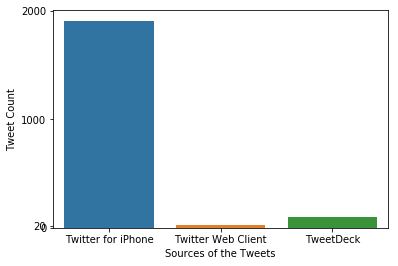

In [54]:
#Sources of Tweets
sb.countplot(data = df, x='source_final')
y_ticks = [0, 20, 1000,2000]
plt.yticks(y_ticks)
plt.xlabel('Sources of the Tweets')
plt.ylabel('Tweet Count')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2038
Data columns (total 14 columns):
tweet_id         2039 non-null int64
timestamp        2039 non-null object
text             2039 non-null object
expanded_urls    2038 non-null object
name             2039 non-null object
doggo            2039 non-null object
floofer          2039 non-null object
pupper           2039 non-null object
puppo            2039 non-null object
source_final     2039 non-null object
retweet_count    2039 non-null int64
fav_count        2039 non-null int64
full_text        2039 non-null object
ratings          2039 non-null float64
dtypes: float64(1), int64(3), object(10)
memory usage: 318.9+ KB


Text(0,0.5,'Retweet Count')

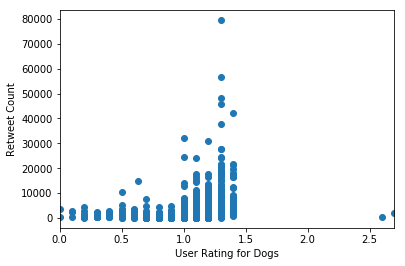

In [55]:
#Check corelation between retweet counts and ratings assigned to the dog pictures
tw_arch.info()
plt.scatter(data= df, x= 'ratings', y='retweet_count')
x_ticks = [0,0.5,1,1.5,2, 2.5,3.0 ]
plt.xticks(x_ticks)
plt.xlim(0,2.7)
plt.xlabel('User Rating for Dogs')
plt.ylabel('Retweet Count')

In [56]:
#Check the best breeds from the image predictions file
df1.head()

df1.p1.value_counts(),img_pred.p2.value_counts(),img_pred.p3.value_counts()

(golden_retriever             131
 Labrador_retriever            91
 Pembroke                      85
 Chihuahua                     78
 pug                           54
 chow                          40
 Samoyed                       38
 Pomeranian                    35
 toy_poodle                    35
 malamute                      29
 cocker_spaniel                26
 Chesapeake_Bay_retriever      22
 miniature_pinscher            22
 seat_belt                     21
 French_bulldog                20
 German_shepherd               20
 Siberian_husky                20
 Maltese_dog                   18
 teddy                         18
 Staffordshire_bullterrier     18
 Shetland_sheepdog             18
 Rottweiler                    17
 beagle                        17
 Italian_greyhound             16
 Shih-Tzu                      16
 Lakeland_terrier              16
 Cardigan                      15
 kuvasz                        15
 Eskimo_dog                    14
 web_site     